K = 1, Inertia = 48.14315359899362
K = 2, Inertia = 20.605966618045603
K = 3, Inertia = 18.899753716842298
K = 4, Inertia = 14.283876043438449
K = 5, Inertia = 6.954278850854948
K = 6, Inertia = 6.5116404476459175
K = 7, Inertia = 4.72073351722715
K = 8, Inertia = 4.007144374720683
K = 9, Inertia = 3.2995045167969015
K = 10, Inertia = 2.6743683244008616


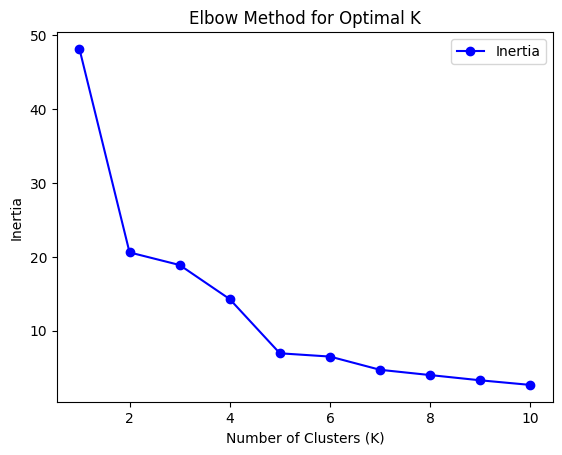

K = 2, Inertia = 20.605966618045603


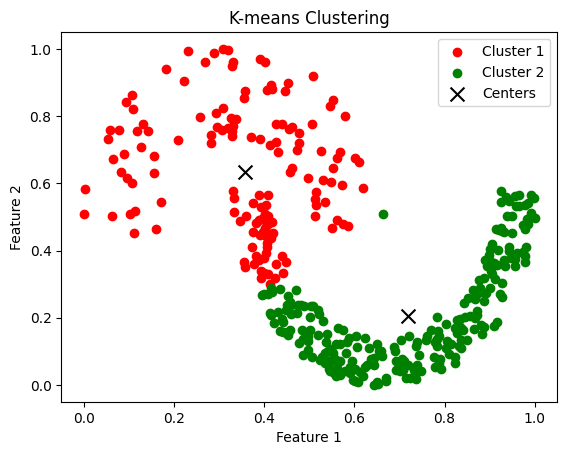

K = 4, Inertia = 14.283876043438449


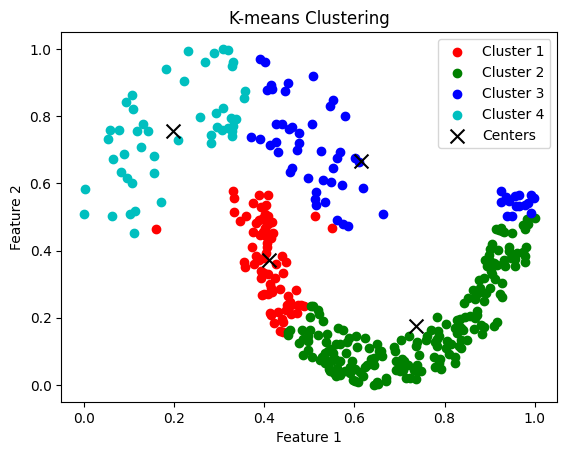

K = 6, Inertia = 6.5116404476459175


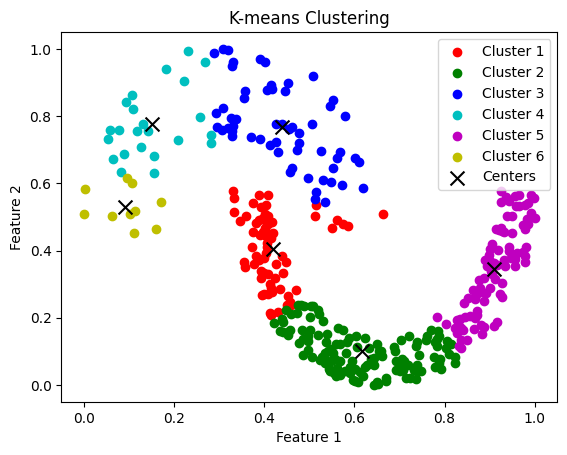

K = 7, Inertia = 4.72073351722715


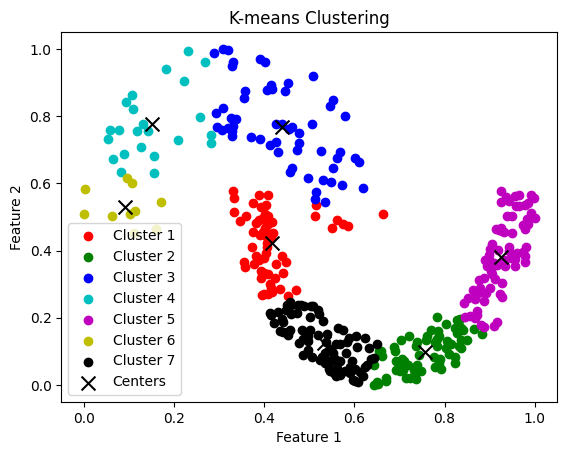

In [4]:
import random
import math
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def k_means(data, K, max_iterations=100, shift_threshold=50):
    random.seed(11221203)
    centers = random.sample(data, K)

    clusters = [[] for _ in range(K)]
    itr = 0
    shift = 0

    while True:
        clusters = [[] for _ in range(K)]

        for point in data:
            distances = [euclidean_distance(point, center) for center in centers]
            closest_center_idx = distances.index(min(distances))
            clusters[closest_center_idx].append(point)

        new_centers = []
        for i, cluster in enumerate(clusters):
            if cluster: 
                new_center = [sum(coord) / len(cluster) for coord in zip(*cluster)]
                new_centers.append(new_center)
            else:
                new_centers.append(centers[i]) 

        shift = sum(
            1 for i, cluster in enumerate(clusters) for point in cluster
            if point not in clusters[i]
        )

        centers = new_centers
        itr += 1

        if itr > 1 and shift < shift_threshold:
            break

    return clusters, centers

def load_dataset(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            data.append([float(value) for value in line.split()])
    return data

def plot_clusters(data, clusters, centers):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        if cluster:
            cluster_x = [point[0] for point in cluster]
            cluster_y = [point[1] for point in cluster]
            plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}', color=colors[i % len(colors)])

    center_x = [center[0] for center in centers]
    center_y = [center[1] for center in centers]
    plt.scatter(center_x, center_y, color='black', marker='x', s=100, label='Centers')
    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def calculate_inertia(clusters, centers):
    inertia = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            inertia += euclidean_distance(point, centers[i]) ** 2
    return inertia

def elbow_method(data, k_range):
    inertias = []

    for K in k_range:
        clusters, centers = k_means(data, K)
        inertia = calculate_inertia(clusters, centers)
        inertias.append(inertia)
        print(f'K = {K}, Inertia = {inertia}')

    plt.plot(k_range, inertias, 'bo-', label='Inertia')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    data = load_dataset('jain_feats.txt')

    elbow_method(data, range(1, 11))

    for K in [2, 4, 6, 7]:
        clusters, centers = k_means(data, K)
        inertia = calculate_inertia(clusters, centers)
        print(f'K = {K}, Inertia = {inertia}')

        plot_clusters(data, clusters, centers)
